# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?

La Base de données "Movies" est composée de 4 tables : "movies", "countries", "roles" et "artists"

        table "movies" - la clé primaire est id et elle reçoit les clés étrangères :
        
            - directorId en lien avec la table "artists" et sa clé primaire "id" ; la cardinalité s'exprime ainsi, il ne peut y avoir qu'un seul réalisateur par film, mais un réalisateur peut faire plusieurs films. Cela permet également d'identifier un réalisateur unique grâce à son code "id" identique dans la table "artists".
            - countrycode en lien avec la table "countries" et sa clé primaire "code" ; la cardinalité s'exprime ainsi, un film peut n'avoir qu'un code pays, mais il y a un choix de plusieurs pays possible.
            - movieId en lien avec la table "roles" et sa clé primaire (movieId, actorId) ; il s'agit d'une relation directe un film peut avoir plusieurs "character".
            
        table "roles" - la clé primaire est composée des colonnes (movieId et actorId). Elle est reliée à la table "movies" par l'intermédiaire de movieId. Elle est également reliée à la table "artists" grâce à la relation "actorId" - "id"(de le table artists). il s'agit d'une relation directe également qui définit qu'un actorId est unique et on va retrouver son nom et prénom dans la table "artists" à l'aide de l'"id" qui sera identique.
        
        table "countries" - avec sa clé primaire "code" n'est reliée qu'à la table "movies".
        
        table "artists" - sa clé primaire est "id".

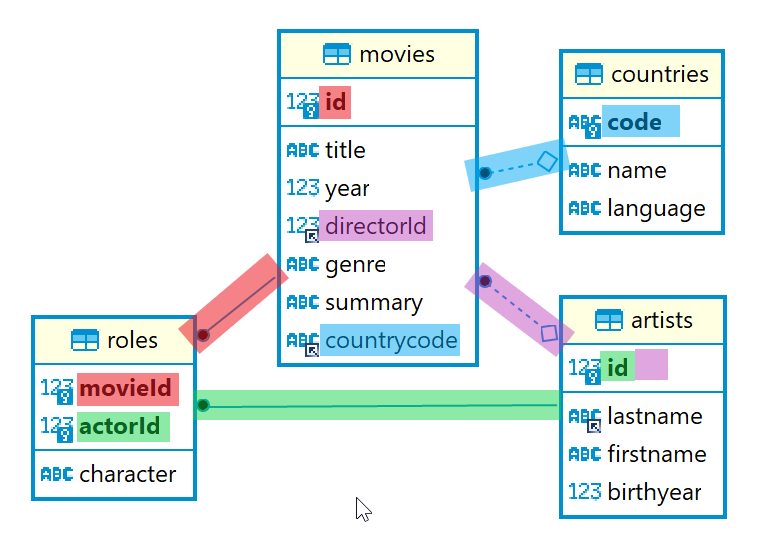

In [1]:
from IPython.display import Image
Image("Img/ERD.PNG")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [ ]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

In [ ]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

In [ ]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

In [ ]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [ ]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

In [ ]:
results.shape

In [ ]:
len(results)

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [5]:
sql_query_01 = """
    SELECT *
    FROM movies
    WHERE genre = 'Drame'
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head(5)

,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK


In [6]:
results.shape

(83, 7)

In [7]:
len(results)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [8]:
sql_query_02 = """
    SELECT year AS annee, lastname, firstname, actorId, movieId, title
    FROM roles, movies, artists
    WHERE
    	roles.movieId = movies.id
    	AND roles.actorId = artists.id 
    	AND lastname = 'Willis'
    	AND firstname = 'Bruce'
    ORDER BY `year`
"""

results = pd.read_sql_query(sql_query_02, engine)
results.head(6)

,annee,lastname,firstname,actorId,movieId,title
0,1988,Willis,Bruce,62,562,Piège de cristal
1,1990,Willis,Bruce,62,1573,58 minutes pour vivre
2,1994,Willis,Bruce,62,680,Pulp Fiction
3,1995,Willis,Bruce,62,1572,Une Journée en enfer
4,2007,Willis,Bruce,62,1571,Die Hard 4 : Retour en enfer


Q03: Qui est le réalisateur de Memento ?

In [9]:
sql_query_03 = """
    SELECT title, directorId, lastname, firstname
    FROM movies, artists
    WHERE
        movies.directorId = artists.id
        AND title = 'Memento'
"""

results = pd.read_sql_query(sql_query_03, engine)
results.head(6)

,title,directorId,lastname,firstname
0,Memento,525,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [10]:
sql_query_04 = """
    SELECT actorId, lastname, firstname, movieId, title
    FROM roles INNER JOIN movies
        ON roles.movieId = movies.id
            INNER JOIN artists
                ON roles.actorId = artists.id
    WHERE `character` = 'Chewbacca'
"""

results = pd.read_sql_query(sql_query_04, engine)
results.head(10)

,actorId,lastname,firstname,movieId,title
0,24343,Mayhew,Peter,11,La Guerre des étoiles
1,24343,Mayhew,Peter,1891,L'Empire contre-attaque
2,24343,Mayhew,Peter,1892,Le Retour du Jedi
3,24343,Mayhew,Peter,140607,Star Wars : Le Réveil de la Force
4,1709041,Suotamo,Joonas,181808,Star Wars : Les Derniers Jedi


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [11]:
sql_query_05 = """
    SELECT title, `character`, lastname, firstname 
    FROM movies, artists, roles
    WHERE 
        movies.id = roles.movieId 
        AND roles.actorId = artists.id
        AND `character` = 'John McClane'
        AND lastname = 'Willis'
        AND firstname = 'Bruce'
"""

results = pd.read_sql_query(sql_query_05, engine)
results.head(10)

,title,character,lastname,firstname
0,Piège de cristal,John McClane,Willis,Bruce
1,Die Hard 4 : Retour en enfer,John McClane,Willis,Bruce
2,Une Journée en enfer,John McClane,Willis,Bruce
3,58 minutes pour vivre,John McClane,Willis,Bruce


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [12]:
sql_query_06 = """
    SELECT title, lastname, firstname, `character`
    FROM movies, roles, artists
    WHERE
        roles.movieId = movies.id 
        AND roles.actorId = artists.id
        AND title = 'Sueurs froides'
"""

results = pd.read_sql_query(sql_query_06, engine)
results.head(10)

,title,lastname,firstname,character
0,Sueurs froides,Stewart,James,Det. John 'Scottie' Ferguson
1,Sueurs froides,Novak,Kim,Madeleine Elster / Judy Barton
2,Sueurs froides,Bel Geddes,Barbara,Marjorie 'Midge' Wood


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [13]:
sql_query_07_01 = """
    SELECT lastname, firstname, id 
    FROM artists
    WHERE
        lastname = 'Burton'
        AND firstname = 'Tim'
"""

results = pd.read_sql_query(sql_query_07_01, engine)
results.head(10)

,lastname,firstname,id
0,Burton,Tim,510


In [14]:
sql_query_07_02 = """
    SELECT title, `character`, lastname, firstname 
    FROM movies, roles, artists
    WHERE 
        movies.id = roles.movieId 
        AND roles.actorId = artists.id
        AND directorId = 510
        AND lastname = 'Depp'
"""

results = pd.read_sql_query(sql_query_07_02, engine)
results.head(10)

,title,character,lastname,firstname
0,"Sleepy Hollow, La Légende du cavalier sans tête",Ichabod Crane,Depp,Johnny


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [15]:
sql_query_08 = """
    SELECT title, `character`, lastname, firstname 
    FROM movies, roles, artists
    WHERE 
        movies.id = roles.movieId 
        AND roles.actorId = artists.id
        AND lastname = 'Allen'
        AND firstname = 'Woody'
"""

results = pd.read_sql_query(sql_query_08, engine)
results.head(10)

,title,character,lastname,firstname
0,Scoop,Sid Waterman,Allen,Woody
1,Manhattan,Isaac Davis,Allen,Woody
2,Annie Hall,Alvy Singer,Allen,Woody
3,Maris et femmes,Prof. Gabriel 'Gabe' Roth,Allen,Woody


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [16]:
sql_query_09 = """
    Select title, lastname, firstname, `character` 
    FROM movies m, artists a2, roles r2 
    WHERE
        m.directorId = a2.id
        AND r2.movieId = m.id 
        AND r2.actorId = a2.id
    ORDER BY lastname
"""

results = pd.read_sql_query(sql_query_09, engine)
results.head(20)

,title,lastname,firstname,character
0,Scoop,Allen,Woody,Sid Waterman
1,Manhattan,Allen,Woody,Isaac Davis
2,Annie Hall,Allen,Woody,Alvy Singer
3,Maris et femmes,Allen,Woody,Prof. Gabriel 'Gabe' Roth
4,Opening Night,Cassavetes,John,Maurice Aarons
5,Le dictateur,Chaplin,Charlie,"Adenoid Hynkel, Dictator of Tomania / A Jewish..."
6,Les temps modernes,Chaplin,Charlie,A factory worker
7,Les feux de la rampe,Chaplin,Charlie,Calvero
8,Le Kid,Chaplin,Charlie,A Tramp
9,Impitoyable,Eastwood,Clint,Bill Munny


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [ ]:
sql_query_10 = """
    SELECT Title
    FROM movies, artists, roles
    WHERE
        movies.directorId = artists.id
        AND artists.id = roles.actorId 
        AND directorId = 138
"""

results = pd.read_sql_query(sql_query_10, engine)
results.head(20)

Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

Q12: Quels sont les films de Hitchcock sans James Stewart

Q13: Quel est la filmographie de James Stewart ?

In [17]:
sql_query_13 = """
    SELECT title, lastname, firstname, `character`
    FROM movies m, roles, artists a 
    WHERE
        m.id = roles.movieId 
        AND roles.actorId = a.id 
        AND lastname = 'Stewart'
        AND firstname = 'James'
"""

results = pd.read_sql_query(sql_query_13, engine)
results.head(20)

,title,lastname,firstname,character
0,Sueurs froides,Stewart,James,Det. John 'Scottie' Ferguson
1,Fenêtre sur cour,Stewart,James,L.B. Jefferies
2,L'homme qui en savait trop,Stewart,James,Dr. Ben McKenna


Q14: Quels sont les films sans rôle (acteurs) ?

Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [18]:
sql_query_16 = """
    SELECT directorId, lastname, firstname, COUNT(title)
    FROM artists, movies
    WHERE movies.directorId = artists.id 
    GROUP BY directorId 
    ORDER BY COUNT(title) DESC
"""

results = pd.read_sql_query(sql_query_16, engine)
results.head(10)

,directorId,lastname,firstname,COUNT(title)
0,488,Spielberg,Steven,13
1,2636,Hitchcock,Alfred,10
2,1243,Allen,Woody,8
3,138,Tarantino,Quentin,7
4,240,Kubrick,Stanley,7
5,1776,Ford Coppola,Francis,6
6,525,Nolan,Christopher,6
7,578,Scott,Ridley,6
8,3556,Polanski,Roman,6
9,1,Lucas,George,5


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

Q19: Quels sont les 10 pays produisant le plus de films ?

In [19]:
sql_query_19 = """
    SELECT name, countrycode, COUNT(countrycode) 
    FROM movies INNER JOIN countries
        ON movies.countrycode = countries.code 
    GROUP BY countrycode
    ORDER BY COUNT(countrycode) DESC
"""

results = pd.read_sql_query(sql_query_19, engine)
results.head(10)

,name,countrycode,COUNT(countrycode)
0,Etats-Unis,US,131
1,France,FR,39
2,Royaume-Uni,GB,21
3,Canada,CA,6
4,Allemagne,DE,5
5,Italie,IT,5
6,Japan,JP,4
7,Australia,AU,3
8,Suède,SE,3
9,Belgium,BE,2


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [20]:
sql_query_20 = """
    SELECT actorId, lastname, firstname, COUNT(actorId), countrycode
    FROM roles, artists, movies
	WHERE
        roles.actorId = artists.id
        AND roles.movieId = movies.id
        AND countrycode = "FR"
    GROUP BY actorId
    ORDER BY COUNT(actorId) DESC
"""

results = pd.read_sql_query(sql_query_20, engine)
results.head(5)

,actorId,lastname,firstname,COUNT(actorId),countrycode
0,3784,Piccoli,Michel,3,FR
1,3829,Belmondo,Jean-Paul,3,FR
2,50,Deneuve,Catherine,3,FR
3,11546,Fresnay,Pierre,2,FR
4,17498,Arestrup,Niels,2,FR


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)